In [234]:
import importlib
import os

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

importlib.reload(plt)


<module 'matplotlib.pyplot' from 'C:\\Users\\matfr\\miniconda3\\envs\\serverless-ml-2\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [67]:
df = pd.read_csv('wuf20-91_M_24_it.csv', index_col=0)
df.shape

(7200, 21)

In [74]:
m = df.groupby(['dataset_file', 'it']).apply(
    lambda x: x.sort_values('generation').assign(
        max_best_gene_weight_so_far=x['best_gene_weight'].cummax())
).reset_index(drop=True)

In [75]:

m[(m['it'] == 0) & (m['dataset_file'] == 'wuf20-01.mwcnf')][
    ['generation', 'max_best_gene_weight_so_far', 'best_gene_weight']]

,generation,max_best_gene_weight_so_far,best_gene_weight
0,0,1712,1712
1,1,1831,1831
2,2,2216,2216
3,3,2216,1633
4,4,2216,2216
5,5,2216,1634
6,6,2216,2138
7,7,2216,2177
8,8,2216,1713
9,9,2216,1750


In [ ]:
def calc_cummax(df, feature):
    return df.sort_values(['dataset_file', 'it', 'generation']).groupby(['dataset_file', 'it'])[feature].cummax()

In [121]:


m = calc_cummax(df, 'best_gene_weight')
df['best_gene_weight_cummax'] = m
df[(df['it'] == 0) & (df['dataset_file'] == 'wuf20-01.mwcnf')][['best_gene_weight', 'best_gene_weight_cummax']]

,best_gene_weight,best_gene_weight_cummax
0,1286,1286
1,1518,37624
2,2063,37624
3,2527,37624
4,1673,37624
...,...,...
55895,34684,38800
55896,34684,38800
55897,34684,38800
55898,34684,38800


In [90]:
# it0 = df.groupby(by=['dataset_file', 'generation']).mean()
# it0
crosstab = pd.crosstab(df['dataset_file'], df['generation'], values=df['best_gene_weight'], aggfunc='count')
crosstab

# plt.plot(it0['best_gene_weight'])

generation,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
dataset_file,,,,,,,,,,,,,,,,,,,,,
wuf20-01.mwcnf,24,24,24,24,24,24,24,24,24,24,...,24,24,24,24,24,24,24,24,24,24
wuf20-010.mwcnf,24,24,24,24,24,24,24,24,24,24,...,24,24,24,24,24,24,24,24,24,24
wuf20-0100.mwcnf,24,24,24,24,24,24,24,24,24,24,...,24,24,24,24,24,24,24,24,24,24
wuf20-01000.mwcnf,24,24,24,24,24,24,24,24,24,24,...,24,24,24,24,24,24,24,24,24,24
wuf20-0101.mwcnf,24,24,24,24,24,24,24,24,24,24,...,24,24,24,24,24,24,24,24,24,24


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


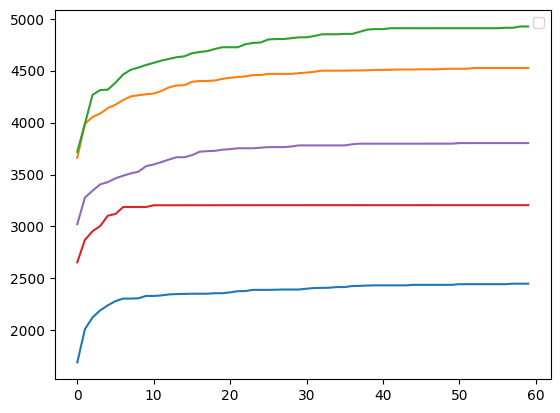

In [89]:
plt.plot(crosstab.transpose())
plt.legend()

In [99]:
pp = pd.read_csv("checkpoint/wuf20-91_M_577190.csv")


In [100]:
pp.columns

Index(['Unnamed: 0', 'best_gene_fitness', 'best_gene_not_fulfilled',
       'best_gene_weight', 'best_valid_fitness', 'best_valid_not_fulfilled',
       'best_valid_weight', 'valid_count', 'avg_fitness', 'median_fitness',
       'std_fitness', 'avg_not_fulfilled', 'avg_weight', 'generation', 'it',
       'category', 'dataset_name', 'dataset_file', 'time', 'solution_weights',
       'config_population_size', 'config_initial_mutation_rate',
       'config_mutation_scaler', 'config_generations', 'config_elites_cnt'],
      dtype='object')

In [101]:
pp[['it', 'generation', 'best_gene_weight', 'best_valid_weight', 'solution_weights']]

,it,generation,best_gene_weight,best_valid_weight,solution_weights
0,0,0,1828,NaN,2293
1,1,0,2025,NaN,2293
2,2,0,2216,NaN,2293
3,3,0,1711,NaN,2293
4,4,0,1208,NaN,2293
5,5,0,2063,NaN,2293
6,0,0,2579,NaN,4399
7,1,0,2802,NaN,4399
8,2,0,3244,NaN,4399
9,3,0,3425,NaN,4399


In [293]:
df = pd.DataFrame()

for file in os.listdir("checkpoint/v1"):
    if file.startswith("wuf20-91_"):
        df = pd.concat([df, pd.read_csv("checkpoint/" + file)], ignore_index=True)
config_cols = [c for c in df.columns if c.startswith('config')]

df.shape, df.columns

((117600, 24),
 Index(['Unnamed: 0', 'best_gene_fitness', 'best_gene_not_fulfilled',
        'best_gene_weight', 'best_valid_fitness', 'best_valid_weight',
        'valid_count', 'avg_fitness', 'median_fitness', 'std_fitness',
        'avg_not_fulfilled', 'avg_weight', 'generation', 'it', 'category',
        'dataset_name', 'dataset_file', 'time', 'solution_weights',
        'config_population_size', 'config_initial_mutation_rate',
        'config_mutation_scaler', 'config_generations', 'config_elites_cnt'],
       dtype='object'))

In [294]:
def calc_cummax(df, feature):
    return df.sort_values(['generation']).groupby(['dataset_file', 'it', 'category', *config_cols])[feature].apply(
        np.fmax.accumulate)


def calc_cumsum(df, feature):
    return df.sort_values(['generation']).groupby(['dataset_file', 'it', 'category', *config_cols])[feature].apply(
        np.cumsum)


df['best_valid_weight_max'] = calc_cummax(df, 'best_valid_weight')
df['correct'] = df['best_valid_weight_max'] == df['solution_weights']
df['total_time'] = calc_cumsum(df, 'time')

In [295]:
# df_agg = df.groupby(['dataset_file', 'category', *config_cols, 'generation']).mean()
# df_agg


In [296]:
df.dataset_file.unique()

array(['wuf20-01.mwcnf', 'wuf20-010.mwcnf', 'wuf20-0100.mwcnf',
       'wuf20-01000.mwcnf', 'wuf20-0101.mwcnf'], dtype=object)

In [297]:
df_01_m = df[(df['dataset_file'] == 'wuf20-01.mwcnf') & (df['category'] == 'M')]
df_01_m.shape

(5880, 27)

In [298]:
df_01_m

,Unnamed: 0,best_gene_fitness,best_gene_not_fulfilled,best_gene_weight,best_valid_fitness,best_valid_weight,valid_count,avg_fitness,median_fitness,std_fitness,...,time,solution_weights,config_population_size,config_initial_mutation_rate,config_mutation_scaler,config_generations,config_elites_cnt,best_valid_weight_max,correct,total_time
0,0,22376.400000,4,1286,NaN,NaN,0,9255.756598,8305.559441,4338.736297,...,1.371053,2293,100,0.15,1.00,80,0,NaN,False,1.371053
1,1,33396.000000,3,1518,NaN,NaN,0,10071.730103,9407.551282,5086.336448,...,1.371053,2293,100,0.15,1.00,80,0,NaN,False,2.742107
2,2,29569.666667,5,2063,NaN,NaN,0,9796.434954,8641.402597,5316.083363,...,1.371053,2293,100,0.15,1.00,80,0,NaN,False,4.113160
3,3,36220.333333,5,2527,NaN,NaN,0,10366.482881,9526.051282,5270.814715,...,1.371053,2293,100,0.15,1.00,80,0,NaN,False,5.484214
4,4,29110.200000,4,1673,NaN,NaN,0,9379.425156,8348.139394,4600.904119,...,1.371053,2293,100,0.15,1.00,80,0,NaN,False,6.855267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26995,595,208663.000000,0,2293,208663.0,2293.0,51,20234.485172,9090.000000,42814.380648,...,73.928371,2293,1000,0.30,0.97,100,50,2293.0,True,7097.123657
26996,596,208663.000000,0,2293,208663.0,2293.0,49,19828.372315,8809.266667,42361.010249,...,73.928371,2293,1000,0.30,0.97,100,50,2293.0,True,7171.052029
26997,597,208663.000000,0,2293,208663.0,2293.0,49,20068.313112,9068.166667,42374.128495,...,73.928371,2293,1000,0.30,0.97,100,50,2293.0,True,7244.980400
26998,598,208663.000000,0,2293,208663.0,2293.0,49,20343.463557,9203.611888,42403.261979,...,73.928371,2293,1000,0.30,0.97,100,50,2293.0,True,7318.908772


In [328]:
# configs:
df[config_cols].drop_duplicates()

,config_population_size,config_initial_mutation_rate,config_mutation_scaler,config_generations,config_elites_cnt
0,100,0.15,1.00,80,0
2400,200,0.15,1.00,80,0
4800,300,0.15,1.00,80,0
7200,400,0.15,1.00,80,0
9600,500,0.15,1.00,80,0
12000,500,0.30,1.00,80,0
14400,500,0.30,0.97,80,0
16800,500,0.50,0.97,80,0
19200,500,0.15,1.00,80,5
21600,500,0.15,1.00,80,50


# Time comparison

In [339]:
df_time_agg = df.groupby(['category', *config_cols, 'generation'])['time'].mean()
configs_of_interest = [
    {'config_population_size': 100, 'config_initial_mutation_rate': 0.15, "config_mutation_scaler": 1.00,
     "config_generations": 80, "config_elites_cnt": 0},
    {'config_population_size': 200, 'config_initial_mutation_rate': 0.15, "config_mutation_scaler": 1.00,
     "config_generations": 80, "config_elites_cnt": 0},
    {'config_population_size': 300, 'config_initial_mutation_rate': 0.15, "config_mutation_scaler": 1.00,
     "config_generations": 80, "config_elites_cnt": 0},
    {'config_population_size': 400, 'config_initial_mutation_rate': 0.15, "config_mutation_scaler": 1.00,
     "config_generations": 80, "config_elites_cnt": 0},
    {'config_population_size': 500, 'config_initial_mutation_rate': 0.15, "config_mutation_scaler": 1.00,
     "config_generations": 80, "config_elites_cnt": 0}]
# for c in configs_of_interest:
df_time_agg

category  config_population_size  config_initial_mutation_rate  config_mutation_scaler  config_generations  config_elites_cnt  generation
M         100                     0.15                          1.00                    80                  0                  0              1.364640
                                                                                                                               1              1.364640
                                                                                                                               2              1.364640
                                                                                                                               3              1.364640
                                                                                                                               4              1.364640
                                                                                                           

Time x generation

In [340]:
from typing import List, Dict


def filter_by_index(df, filters):
    f = df
    for key in filters.keys():
        f = f[f.index.get_level_values(key) == filters[key]]
    return f


def filter_by_index_any(df, filters: List[Dict]):
    return pd.concat([filter_by_index(df, f) for f in filters])

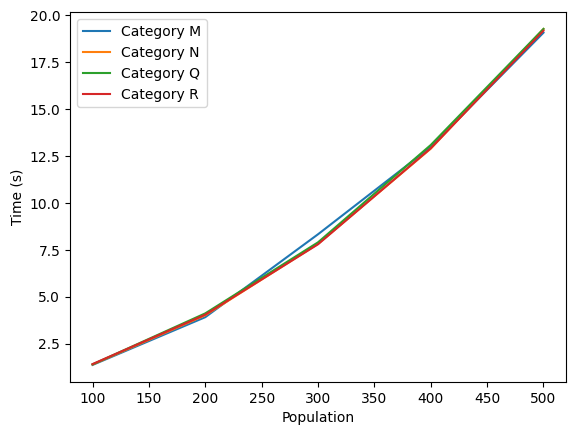

In [341]:
df_time_agg_gen80 = df_time_agg[df_time_agg.index.get_level_values('generation') == 79]
for cat in df.category.unique():
    data_x = []
    data_y = []
    for c in configs_of_interest:
        data_x.append(c['config_population_size'])
        data_y.append(
            filter_by_index(df_time_agg_gen80[df_time_agg_gen80.index.get_level_values('category') == cat], c).iloc[0])
    plt.plot(data_x, data_y, label=f"Category {cat}")
    plt.xlabel('Population')
    plt.ylabel('Time (s)')

plt.legend()
plt.show()

# Success rate

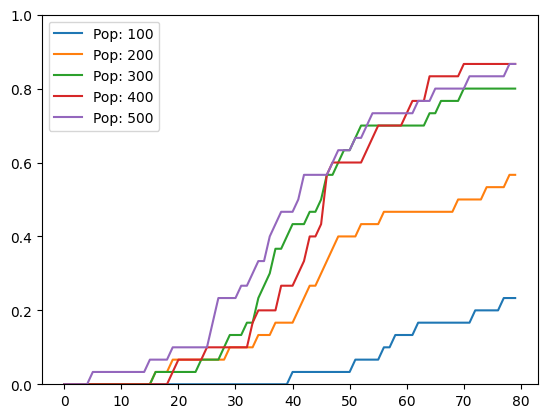

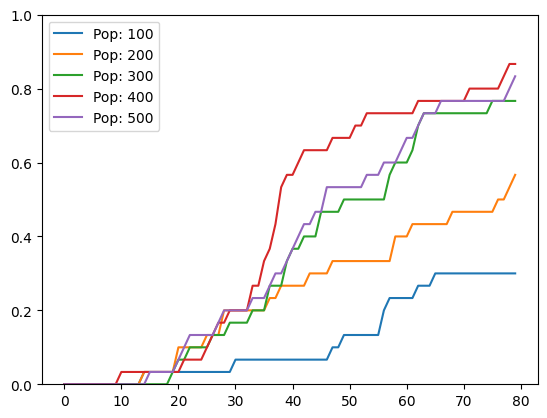

In [349]:
def show_success(df, category, configs_of_interest, label_fn=lambda x: f"Pop: {x[1]}"):
    df_agg = df[df['category'] == category].groupby(['category', *config_cols, 'generation']).mean()

    df_agg = filter_by_index_any(df_agg, configs_of_interest)
    for i, frame in df_agg.reset_index().groupby(['category', *config_cols]):
        plt.plot(frame['generation'], frame['correct'], label=label_fn(i))
    plt.ylim(0, 1)
    plt.legend()
    plt.show()


show_success(df, 'M', configs_of_interest)
show_success(df, 'N', configs_of_interest)

# Mutation:

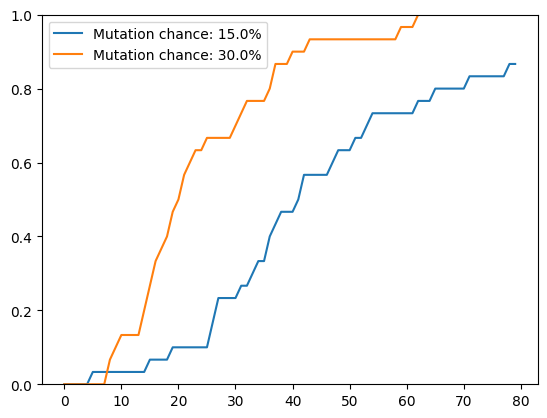

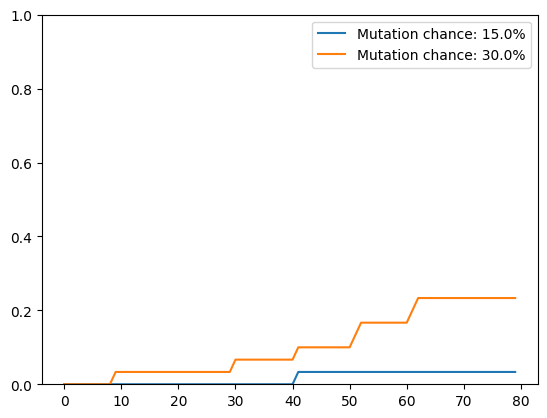

In [348]:
def generate_config(arr: List[List]) -> List[Dict]:
    res = []
    for a in arr:
        d = {}
        for k, v in zip(config_cols, a):
            d[k] = v
        res.append(d)
    return res


show_success(df, "M",
             generate_config(
                 [[500, 0.15, 1.00, 80, 0],
                  [500, 0.30, 1.00, 80, 0], ]
             ),
             lambda x: f"Mutation chance: {x[2] * 100}%")
show_success(df, "R",
             generate_config(
                 [[500, 0.15, 1.00, 80, 0],
                  [500, 0.30, 1.00, 80, 0], ]
             ),
             lambda x: f"Mutation chance: {x[2] * 100}%")

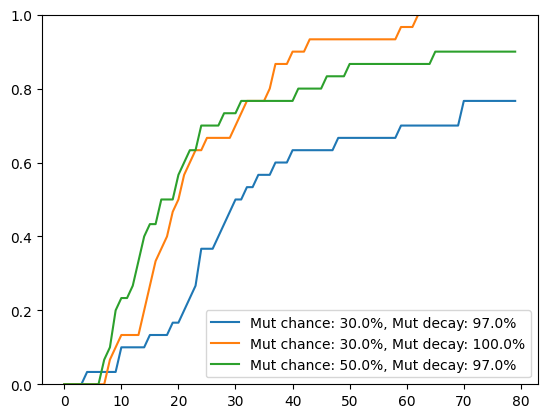

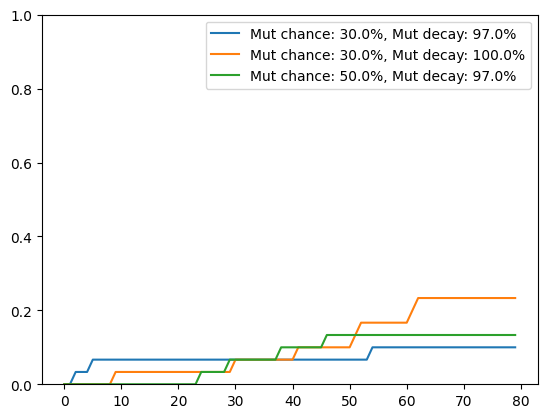

In [363]:
cnf = generate_config(
    [[500, 0.30, 1.00, 80, 0],
     [500, 0.30, 0.97, 80, 0],
     [500, 0.50, 0.97, 80, 0], ]
)
# show_success(df, "M", cnf, lambda x: f"Mut chance: {x[2] * 100}%, Mut decay: {x[3] * 100}%")
show_success(df, "M", cnf, lambda x: f"Mut chance: {x[2] * 100}%, Mut decay: {x[3] * 100}%")
show_success(df, "R", cnf, lambda x: f"Mut chance: {x[2] * 100}%, Mut decay: {x[3] * 100}%")

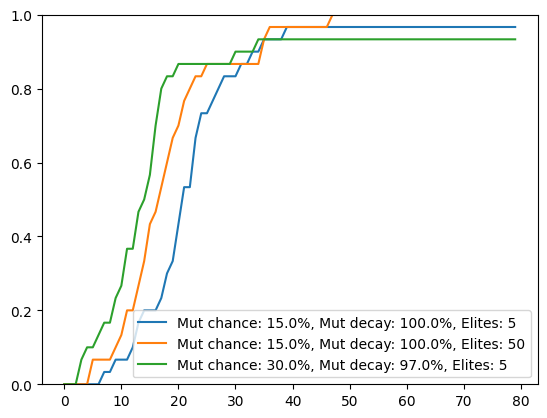

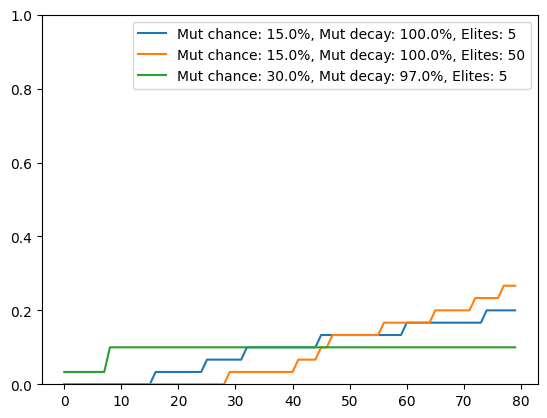

In [366]:
cnf = generate_config(
    [
        [500, 0.15, 1.00, 80, 5],
        [500, 0.15, 1.00, 80, 50],
        [500, 0.30, 0.97, 80, 5],
    ]
)
# show_success(df, "M", cnf, lambda x: f"Mut chance: {x[2] * 100}%, Mut decay: {x[3] * 100}%")
show_success(df, "M", cnf, lambda x: f"Mut chance: {x[2] * 100}%, Mut decay: {x[3] * 100}%, Elites: {x[5]}")
show_success(df, "R", cnf, lambda x: f"Mut chance: {x[2] * 100}%, Mut decay: {x[3] * 100}%, Elites: {x[5]}")